## **Import Libraries**

In [1]:
# import core libaries
import numpy as np
import pandas as pd
import time

# import the MNIST dataset
from keras.datasets import mnist

# import keras libraries
from keras import models
from keras import layers
from keras import callbacks
from keras.utils import np_utils

# import sklearn libraries
from sklearn import metrics
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier

# import matplotlib libraries
import matplotlib.pyplot as plt

# import seaborn libraries
import seaborn as sns

# import bokeh
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import row
output_notebook()

## **Load MNIST dataset**
Load the MNIST dataset with 55,000 for training images, 10,000 for test images, and 5,000 images held back for validation

In [2]:
# load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images shape: {} --- train_labels shape: {}'.format(train_images.shape, train_labels.shape))
print('test_images shape: {} --- test_labels shape: {}'.format(test_images.shape, test_labels.shape))

# reshape the images to float32 tensors
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# hold back 5000 of the 60000 images for validation
validation_images = train_images[:5000]
partial_train_images = train_images[5000:]
validation_labels = train_labels[:5000]
partial_train_labels = train_labels[5000:]

# one-hot code lables
train_labels = np_utils.to_categorical(train_labels)
partial_train_labels = np_utils.to_categorical(partial_train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)

print('-'*100)
print('validation_images shape: {} --- validation_labels shape: {}'.format(validation_images.shape, validation_labels.shape))
print('partial_train_images shape: {} --- partial_train_lables shape {}'.format(partial_train_images.shape, partial_train_labels.shape))
print('test_images shape: {} --- test_labels shape: {}'.format(test_images.shape, test_labels.shape))

train_images shape: (60000, 28, 28) --- train_labels shape: (60000,)
test_images shape: (10000, 28, 28) --- test_labels shape: (10000,)
----------------------------------------------------------------------------------------------------
validation_images shape: (5000, 784) --- validation_labels shape: (5000, 10)
partial_train_images shape: (55000, 784) --- partial_train_lables shape (55000, 10)
test_images shape: (10000, 784) --- test_labels shape: (10000, 10)


**Plot the first few images to visualize the dataset**

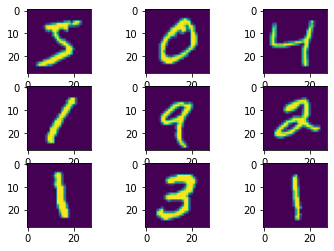

In [3]:
for i in range(9):
  img = train_images[i].reshape(28,28)
  plt.subplot(330 + 1 + i)
  plt.imshow(img)
plt.show()

**Plot the distribution of labels**

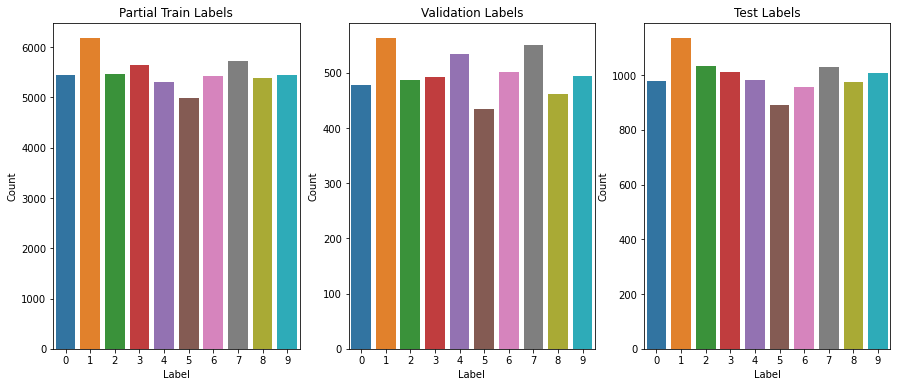

In [4]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
# partial train labels
sns.countplot(x=[np.argmax(y) for y in partial_train_labels], ax=axarr[0])
axarr[0].set(xlabel='Label', ylabel='Count', title='Partial Train Labels')

# validation labels
sns.countplot(x=[np.argmax(y) for y in validation_labels], ax=axarr[1])
axarr[1].set(xlabel='Label', ylabel='Count', title='Validation Labels')

# test labels
sns.countplot(x=[np.argmax(y) for y in test_labels], ax=axarr[2])
axarr[2].set(xlabel='Label', ylabel='Count', title='Test Labels')

plt.show()

## **Reusable Code**

In [5]:
def plot_results(train_accuracy, validation_accuracy, train_loss, validation_loss):
  x_plt = np.arange(0, len(train_accuracy), 1)

  # Accuracy Plot
  p=figure(plot_width=600, plot_height=350, title='Training & Validation Accuracy', x_axis_label='Epoch', y_axis_label='Accuracy')
  p.line(x=x_plt, y=train_accuracy, legend_label='Training Accuracy', line_width=3, color='black')
  p.line(x=x_plt, y=validation_accuracy, legend_label='Validation Accuracy', line_width=3, color='red')
  p.legend.location='bottom_right'

  # Loss Plot
  q=figure(plot_width=600, plot_height=350, title='Training & Validation Loss', x_axis_label='Epoch', y_axis_label='Loss')
  q.line(x=x_plt, y=train_loss, legend_label='Training Loss', line_width=3, color='black')
  q.line(x=x_plt, y=validation_loss, legend_label='Validation Loss', line_width=3, color='red')
  q.legend.location='bottom_right'

  show(row(p,q))

def visualize_actual_vs_predicted(actual, predicted, classes):
  plt.figure(figsize=(20, 10))
  
  for c in classes:
    dig_mtx = test[(actual==c) & (predicted)!=c]

    for r in range(10):
      rdm_index = np.random.choice(dig_mtx.index)
      pic = dig_mtx.loc[rdm_index]
      pic_np=np.array()

## **Experiment 1**
**Create a dense neural network consisting of 784 input nodes, a hidden layer with 1 node, and 10 output nodes (corresponding to the 10 digits)**

In [6]:
# Dense neural network consisting of 784 input nodes, a hiden layer with 1 node, and 10 output nodes
model1 = models.Sequential()
model1.add(layers.Dense(1, activation='relu', input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [7]:
# compile the neural network
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
# fit the model
experiment1_history = model1.fit(partial_train_images, partial_train_labels, validation_data=(validation_images, validation_labels),
                                epochs=100, callbacks=early_stopping, batch_size=128)

Epoch 1/100
430/430 [==============================] - 14s 3ms/step - loss: 2.1481 - accuracy: 0.1886 - val_loss: 2.0028 - val_accuracy: 0.2218
Epoch 2/100
430/430 [==============================] - 1s 2ms/step - loss: 1.9934 - accuracy: 0.2115 - val_loss: 1.9419 - val_accuracy: 0.2384
Epoch 3/100
430/430 [==============================] - 1s 2ms/step - loss: 1.9249 - accuracy: 0.2378 - val_loss: 1.8768 - val_accuracy: 0.2482
Epoch 4/100
430/430 [==============================] - 1s 1ms/step - loss: 1.8565 - accuracy: 0.2451 - val_loss: 1.8225 - val_accuracy: 0.2530
Epoch 5/100
430/430 [==============================] - 1s 2ms/step - loss: 1.8091 - accuracy: 0.2636 - val_loss: 1.7875 - val_accuracy: 0.2554
Epoch 6/100
430/430 [==============================] - 1s 1ms/step - loss: 1.7828 - accuracy: 0.2643 - val_loss: 1.7646 - val_accuracy: 0.2782
Epoch 7/100
430/430 [==============================] - 1s 1ms/step - loss: 1.7595 - accuracy: 0.2726 - val_loss: 1.7476 - val_accuracy: 0.277

Evaluate the results

In [8]:
# Get experiment results
partial_train_loss = experiment1_history.history['loss']
validation_loss = experiment1_history.history['val_loss']
partial_train_accuracy = experiment1_history.history['accuracy']
validation_accuracy = experiment1_history.history['val_accuracy']

In [9]:
plot_results(partial_train_accuracy, validation_accuracy, partial_train_loss, validation_loss)

**Analyze the activation values**

Group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 labels of the images that generated them and visualize these sets of values using a boxplot

In [10]:
# extract the outputs of the 2 layers
layer_outputs = [layer.output for layer in model1.layers]

# create a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

# re-group the training and validation images to get to the original 60,000 training images
train_norm = np.concatenate((partial_train_images, validation_images), axis=0)

# get activation values
activations = activation_model.predict(train_norm)
hidden_layer1_activation = activations[0]
output_layer_activations = activations[1]

# get prediction values
train_norm_pred = np.argmax(model1.predict(train_norm), axis=-1)

# put predicted and activation values into dataframe
activation_data = {'predicted_value': train_norm_pred}
for i in range(0, 1):
  activation_data['activation_value'] = hidden_layer1_activation[:,i]

activation_data_df = pd.DataFrame(activation_data)
activation_data_df.head(15)

,predicted_value,activation_value
0,7,0.000000
1,8,3.923320
2,7,0.000000
3,6,3.419813
4,1,8.193049
5,6,3.687908
6,1,7.733801
7,0,1.753112
8,7,0.000000
9,5,2.859699


Visualize the activation values with boxplots

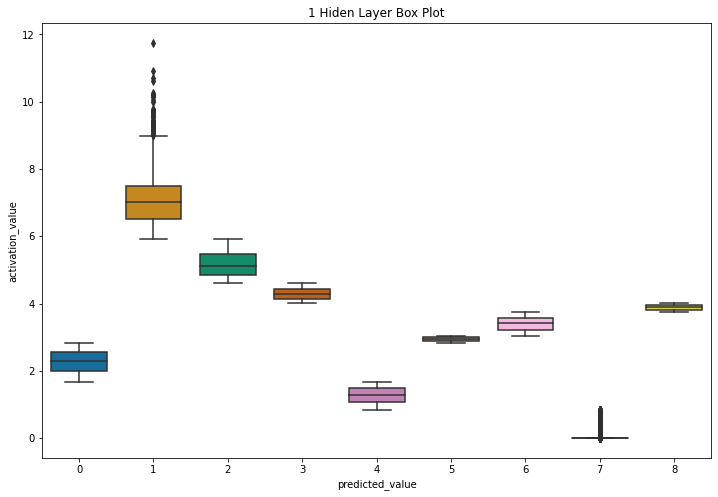

In [11]:
plt.figure(figsize=(12,8))
bplot = sns.boxplot(y='activation_value', x='predicted_value', data=activation_data_df[['activation_value', 'predicted_value']], 
                    width=0.75, palette='colorblind')
plt.title('1 Hiden Layer Box Plot')
plt.show()

As we can see - the activation values of the hidden node are not able to discriminate between the classes

## **Experiment 2**
**Create a dense neural network consisting of 784 input nodes, a hidden layer with 2 node, and 10 output nodes (corresponding to the 10 digits)**

In [12]:
# Dense neural network consisting of 784 input nodes, a hiden layer with 1 node, and 10 output nodes
model2 = models.Sequential()
model2.add(layers.Dense(2, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the neural network
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
# fit the model
experiment2_history = model2.fit(partial_train_images, partial_train_labels, validation_data=(validation_images, validation_labels),
                                epochs=100, callbacks=early_stopping, batch_size=128)

Epoch 1/100
430/430 [==============================] - 2s 2ms/step - loss: 2.0728 - accuracy: 0.2002 - val_loss: 1.6442 - val_accuracy: 0.3886
Epoch 2/100
430/430 [==============================] - 1s 2ms/step - loss: 1.5837 - accuracy: 0.4029 - val_loss: 1.4397 - val_accuracy: 0.4900
Epoch 3/100
430/430 [==============================] - 1s 2ms/step - loss: 1.4200 - accuracy: 0.5036 - val_loss: 1.3024 - val_accuracy: 0.5510
Epoch 4/100
430/430 [==============================] - 1s 2ms/step - loss: 1.2922 - accuracy: 0.5539 - val_loss: 1.2211 - val_accuracy: 0.5782
Epoch 5/100
430/430 [==============================] - 1s 2ms/step - loss: 1.2202 - accuracy: 0.5825 - val_loss: 1.1726 - val_accuracy: 0.5982
Epoch 6/100
430/430 [==============================] - 1s 2ms/step - loss: 1.1738 - accuracy: 0.5992 - val_loss: 1.1397 - val_accuracy: 0.6148
Epoch 7/100
430/430 [==============================] - 1s 2ms/step - loss: 1.1458 - accuracy: 0.6143 - val_loss: 1.1138 - val_accuracy: 0.6314

Evaluate the results

In [14]:
# Get experiment results
partial_train_loss = experiment2_history.history['loss']
validation_loss = experiment2_history.history['val_loss']
partial_train_accuracy = experiment2_history.history['accuracy']
validation_accuracy = experiment2_history.history['val_accuracy']

In [15]:
plot_results(partial_train_accuracy, validation_accuracy, partial_train_loss, validation_loss)

In [16]:
# extract the outputs of the 2 layers
layer_outputs = [layer.output for layer in model2.layers]

# create a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

# re-group the training and validation images to get to the original 60,000 training images
train_norm = np.concatenate((partial_train_images, validation_images), axis=0)

# get activation values
activations = activation_model.predict(train_norm)
hidden_node1_activation = activations[0][:,0]
hidden_node2_activation = activations[1][:,1]

# get prediction values
train_norm_pred = np.argmax(model2.predict(train_norm), axis=-1)

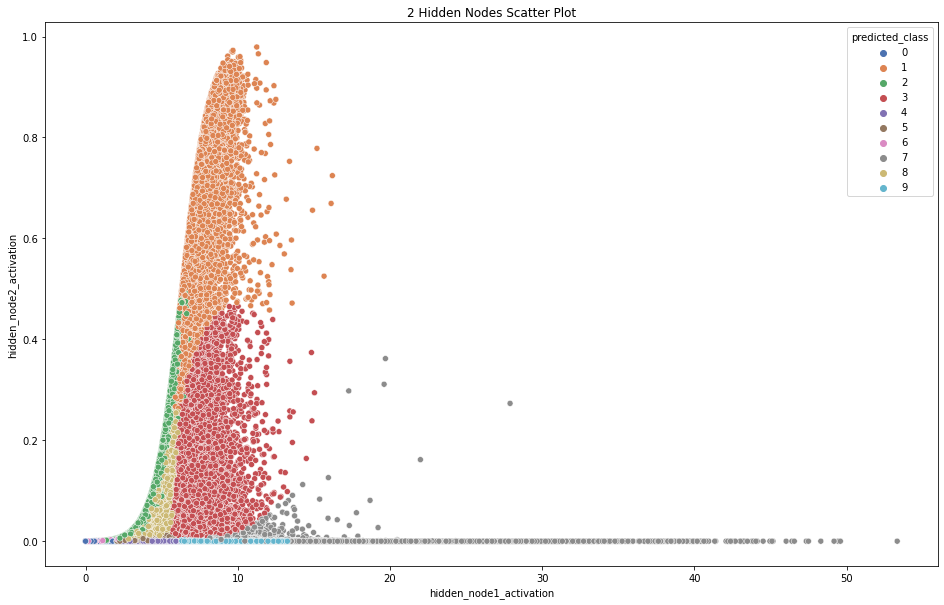

In [17]:
model2_results = pd.DataFrame({'predicted_class': train_norm_pred, 'hidden_node1_activation': hidden_node1_activation, 
                               'hidden_node2_activation': hidden_node2_activation})
plt.figure(figsize=(16,10))
sns.scatterplot(data=model2_results, x='hidden_node1_activation', y='hidden_node2_activation', hue='predicted_class', palette='deep')
plt.title('2 Hidden Nodes Scatter Plot')
plt.show()

**Compare Model 1 and Model 2**

Loss and Accuracy

In [18]:
test_model1_results = model1.evaluate(x=test_images, y=test_labels, batch_size=128, verbose=0)
test_model2_results = model2.evaluate(x=test_images, y=test_labels, batch_size=128, verbose=0)

print('Model 1 Loss: {}\nModel 2 Loss: {}'.format(np.round(test_model1_results[0], 4), np.round(test_model2_results[0], 4)))
print('\nModel 1 Accuracy: {}\nModel 2 Accuracy: {}'.format(np.round(test_model1_results[1], 4), np.round(test_model2_results[1], 4)))

Model 1 Loss: 1.5926
Model 2 Loss: 0.9863

Model 1 Accuracy: 0.3971
Model 2 Accuracy: 0.6901


Confusion Matrix

In [19]:
# get prediction for model 1
test_model1_prediction = np.argmax(model1.predict(test_images), axis=-1)

# get confusion matrix for model 1
model1_confusion_matrix = metrics.confusion_matrix(test_model1_prediction, [np.argmax(y) for y in test_labels])
model1_confusion_matrix_df = pd.DataFrame(model1_confusion_matrix, columns=[x for x in range(10)])
model1_confusion_matrix_df.index = [x for x in range(10)]
model1_confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,641,2,23,58,230,281,153,49,104,60
1,0,1018,345,23,0,9,13,5,26,0
2,1,106,391,285,6,40,138,19,151,0
3,4,6,148,232,18,55,208,10,209,3
4,160,0,3,17,340,49,14,47,28,104
5,59,1,13,37,12,105,55,8,58,10
6,77,1,65,206,28,210,258,17,245,15
7,37,0,3,39,347,73,3,866,33,813
8,1,1,41,113,1,70,116,7,120,4
9,0,0,0,0,0,0,0,0,0,0


In [20]:
# get prediction for model 2
test_model2_prediction = np.argmax(model2.predict(test_images), axis=-1)

# get confusion matrix for model 2
model2_confusion_matrix = metrics.confusion_matrix(test_model2_prediction, [np.argmax(y) for y in test_labels])
model2_confusion_matrix_df = pd.DataFrame(model2_confusion_matrix, columns=[x for x in range(10)])
model2_confusion_matrix_df.index = [x for x in range(10)]
model2_confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,851,0,4,0,43,52,72,2,22,8
1,0,1049,54,99,0,9,0,22,37,1
2,0,23,748,47,3,23,40,4,74,0
3,2,41,30,604,36,49,0,128,135,30
4,32,0,3,3,686,98,3,18,10,137
5,47,1,17,46,63,387,14,7,156,42
6,44,3,71,5,9,43,811,0,56,2
7,0,0,1,38,13,10,0,662,10,152
8,3,18,100,152,13,185,18,8,468,2
9,1,0,4,16,116,36,0,177,6,635


Classification Report

In [21]:
model1_classification_report = metrics.classification_report(test_model1_prediction, [np.argmax(y) for y in test_labels], output_dict=True)
model1_classification_report_df = pd.DataFrame(model1_classification_report).transpose()
model1_classification_report_df=np.round(model1_classification_report_df, 2)
model1_classification_report_df

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.65,0.40,0.50,1601.0
1,0.90,0.71,0.79,1439.0
2,0.38,0.34,0.36,1137.0
3,0.23,0.26,0.24,893.0
4,0.35,0.45,0.39,762.0
5,0.12,0.29,0.17,358.0
6,0.27,0.23,0.25,1122.0
7,0.84,0.39,0.53,2214.0
8,0.12,0.25,0.17,474.0
9,0.00,0.00,0.00,0.0


In [22]:
model2_classification_report = metrics.classification_report(test_model2_prediction, [np.argmax(y) for y in test_labels], output_dict=True)
model2_classification_report_df = pd.DataFrame(model2_classification_report).transpose()
model2_classification_report_df=np.round(model2_classification_report_df, 2)
model2_classification_report_df

,precision,recall,f1-score,support
0,0.87,0.81,0.84,1054.00
1,0.92,0.83,0.87,1271.00
2,0.72,0.78,0.75,962.00
3,0.60,0.57,0.58,1055.00
4,0.70,0.69,0.70,990.00
5,0.43,0.50,0.46,780.00
6,0.85,0.78,0.81,1044.00
7,0.64,0.75,0.69,886.00
8,0.48,0.48,0.48,967.00
9,0.63,0.64,0.64,991.00


## **Experiment 3**
**Explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model.**

In [23]:
# Create 10 experiments starting with 1 node and doubling for each experiment
trials = 10
nodes = np.array([1])
for i in range(trials):
  nodes = np.concatenate([nodes, np.array([nodes[len(nodes)-1]*2])])

nodes

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [24]:
experiment3_history = {}

for n in nodes:
  # create model
  m = models.Sequential()
  m.add(layers.Dense(n, activation='relu', input_shape=(784,)))
  m.add(layers.Dense(10, activation='softmax'))

  # compile the neural network
  m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # early stopping
  early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
  # fit the model
  start = time.time()
  history = m.fit(partial_train_images, partial_train_labels, validation_data=(validation_images, validation_labels),
                                  epochs=100, callbacks=early_stopping, batch_size=128, verbose=0)
  # stats
  end = time.time()
  total_time = end - start
  num_epochs = len(history.history['loss'])
  m_evaluate = m.evaluate(x=test_images, y=test_labels, batch_size=128, verbose=0)
  m_loss = m_evaluate[0]
  m_accuracy = m_evaluate[1]

  print('Fit model with {} nodes in {} seconds and stopped after {} epochs; loss = {} and accuracy = {}'.format(n, total_time, num_epochs,
                                                                                                                np.round(m_loss, 2), np.round(m_accuracy, 2)))
  
  # store history and model
  experiment3_history.update({'{}_nodes'.format(n): {'history': history, 'model': m, 'time': total_time, 'num_epochs': num_epochs, 
                                                     'loss': m_loss, 'accuracy': m_accuracy}})

Fit model with 1 nodes in 47.704965591430664 seconds and stopped after 100 epochs; loss = 1.54 and accuracy = 0.41
Fit model with 2 nodes in 82.55682063102722 seconds and stopped after 100 epochs; loss = 1.51 and accuracy = 0.43
Fit model with 4 nodes in 39.93476581573486 seconds and stopped after 69 epochs; loss = 0.49 and accuracy = 0.86
Fit model with 8 nodes in 29.72637152671814 seconds and stopped after 48 epochs; loss = 0.27 and accuracy = 0.93
Fit model with 16 nodes in 44.94887447357178 seconds and stopped after 72 epochs; loss = 0.18 and accuracy = 0.95
Fit model with 32 nodes in 42.24445176124573 seconds and stopped after 57 epochs; loss = 0.16 and accuracy = 0.96
Fit model with 64 nodes in 31.842227697372437 seconds and stopped after 38 epochs; loss = 0.13 and accuracy = 0.97
Fit model with 128 nodes in 89.16896438598633 seconds and stopped after 74 epochs; loss = 0.19 and accuracy = 0.98
Fit model with 256 nodes in 107.25497174263 seconds and stopped after 61 epochs; loss =

In [25]:
experiment3_performance = {'# Nodes': [], 'Test Accuracy (%)': [], 'Test Loss': [], 'Epochs Before Stop': [], 'Process Time (seconds)': []}
for n in nodes:
  node_results = experiment3_history['{}_nodes'.format(n)]
  experiment3_performance['# Nodes'].append(n)
  experiment3_performance['Test Accuracy (%)'].append(np.round(node_results['accuracy']*100,2))
  experiment3_performance['Test Loss'].append(np.round(node_results['loss'],4))
  experiment3_performance['Epochs Before Stop'].append(node_results['num_epochs'])
  experiment3_performance['Process Time (seconds)'].append(np.round(node_results['time'], 2))
  #experiment3_performance.update({'nodes': n, 'accuracy': node_results['accuracy'], 'loss': node_results['loss'], 
  #                                'number of epochs': node_results['num_epochs']})
  
pd.DataFrame(experiment3_performance)

,# Nodes,Test Accuracy (%),Test Loss,Epochs Before Stop,Process Time (seconds)
0,1,40.62,1.5356,100,47.70
1,2,43.19,1.5138,100,82.56
2,4,86.46,0.4949,69,39.93
3,8,92.77,0.2707,48,29.73
4,16,95.45,0.1769,72,44.95
5,32,96.48,0.1556,57,42.24
6,64,97.46,0.1307,38,31.84
7,128,98.01,0.1902,74,89.17
8,256,98.14,0.1659,61,107.25
9,512,98.34,0.1471,52,148.43


In [26]:
best_accuracy = np.argmax(experiment3_performance['Test Accuracy (%)'])
best_loss = np.argmin(experiment3_performance['Test Loss'])
print('Best Accuracy is {} nodes: {}%'.format(experiment3_performance['# Nodes'][best_accuracy], experiment3_performance['Test Accuracy (%)'][best_accuracy]))
print('Best Loss is {} nodes: {}'.format(experiment3_performance['# Nodes'][best_accuracy], experiment3_performance['Test Loss'][best_accuracy]))

Best Accuracy is 1024 nodes: 98.45%
Best Loss is 1024 nodes: 0.1444


In [27]:
# Accuracy Plot
p=figure(plot_width=600, plot_height=350, title='Test Accuracy', x_axis_label='Number of Nodes', y_axis_label='Accuracy')
p.line(x=experiment3_performance['# Nodes'], y=experiment3_performance['Test Accuracy (%)'], legend_label='Test Accuracy', line_width=3, color='black')
p.legend.location='bottom_right'

# Loss Plot
q=figure(plot_width=600, plot_height=350, title='Test Loss', x_axis_label='Number of Nodes', y_axis_label='Loss')
q.line(x=experiment3_performance['# Nodes'], y=experiment3_performance['Test Loss'], legend_label='Test Loss', line_width=3, color='black')
q.legend.location='top_right'

show(row(p,q))

**1024 nodes is the best model; It has the best accuracy at 98.45% and the lowest loss at 0.1444**

Plot performance for best model

In [28]:
# Get experiment results
partial_train_loss = experiment3_history['1024_nodes']['history'].history['loss']
validation_loss = experiment3_history['1024_nodes']['history'].history['val_loss']
partial_train_accuracy = experiment3_history['1024_nodes']['history'].history['accuracy']
validation_accuracy = experiment3_history['1024_nodes']['history'].history['val_accuracy']

plot_results(partial_train_accuracy, validation_accuracy, partial_train_loss, validation_loss)

In [46]:
# get prediction for best model in experiment 3
test_model3_best_prediction = np.argmax(experiment3_history['1024_nodes']['model'].predict(test_images), axis=-1)

# get confusion matrix for model 3
model3_best_confusion_matrix = metrics.confusion_matrix(test_model3_best_prediction, [np.argmax(y) for y in test_labels])
model3_best_confusion_matrix_df = pd.DataFrame(model3_best_confusion_matrix, columns=[x for x in range(10)])
model3_best_confusion_matrix_df.index = [x for x in range(10)]
model3_best_confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,973,0,3,0,0,2,5,1,1,1
1,1,1126,2,0,0,0,2,2,1,2
2,1,2,1013,2,3,0,0,5,2,1
3,0,2,0,995,0,8,1,1,2,1
4,1,0,1,0,968,1,2,1,3,7
5,0,1,0,3,0,873,5,0,3,2
6,2,2,2,0,2,5,943,0,1,0
7,1,1,6,2,2,0,0,1010,2,3
8,1,1,4,4,0,2,0,5,954,2
9,0,0,1,4,7,1,0,3,5,990


In [47]:
model3_best_classification_report = metrics.classification_report(test_model3_best_prediction, [np.argmax(y) for y in test_labels], output_dict=True)
model3_best_classification_report_df = pd.DataFrame(model3_best_classification_report).transpose()
model3_best_classification_report_df=np.round(model3_best_classification_report_df, 2)
model3_best_classification_report_df

,precision,recall,f1-score,support
0,0.99,0.99,0.99,986.00
1,0.99,0.99,0.99,1136.00
2,0.98,0.98,0.98,1029.00
3,0.99,0.99,0.99,1010.00
4,0.99,0.98,0.98,984.00
5,0.98,0.98,0.98,887.00
6,0.98,0.99,0.98,957.00
7,0.98,0.98,0.98,1027.00
8,0.98,0.98,0.98,973.00
9,0.98,0.98,0.98,1011.00


## **Experiment 4**
**Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.**

In [29]:
# reduce the number of dimensions to add up to the variance of 95% or 154 features
pca = decomposition.PCA(n_components=0.95)
pca_partial_train_images = pca.fit_transform(partial_train_images)
pca_validation_images = pca.transform(validation_images)
pca_test_images = pca.transform(test_images)

print('Reduced {} variables to {}, total removed: {}'.\
      format(partial_train_images.shape[1], pca_partial_train_images.shape[1], partial_train_images.shape[1]-pca_partial_train_images.shape[1]))

print('PCA partial train shape: {}'.format(pca_partial_train_images.shape))
print('PCA validation shape: {}'.format(pca_validation_images.shape))
print('PCA test shape: {}'.format(pca_test_images.shape))

n_featurs = pca_partial_train_images.shape[1]

Reduced 784 variables to 154, total removed: 630
PCA partial train shape: (55000, 154)
PCA validation shape: (5000, 154)
PCA test shape: (10000, 154)


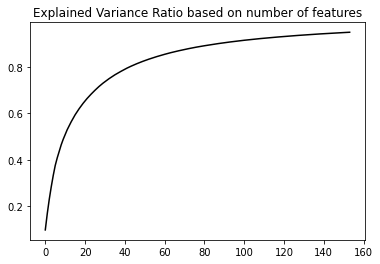

In [30]:
plt.plot(pca.explained_variance_ratio_.cumsum(), color='black')
plt.title('Explained Variance Ratio based on number of features')
plt.show()

In [31]:
# use 1024 nodes which is the best model from experiment 3
model4 = models.Sequential()
model4.add(layers.Dense(1024, activation='relu', input_shape=(n_featurs,))) #154 features
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              158720    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10250     
Total params: 168,970
Trainable params: 168,970
Non-trainable params: 0
_________________________________________________________________


In [32]:
# compile the neural network
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
# fit the model
experiment4_history = model4.fit(pca_partial_train_images, partial_train_labels, validation_data=(pca_validation_images, validation_labels),
                                epochs=100, callbacks=early_stopping, batch_size=128)

Epoch 1/100
430/430 [==============================] - 3s 6ms/step - loss: 0.4656 - accuracy: 0.8868 - val_loss: 0.1142 - val_accuracy: 0.9670
Epoch 2/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9738 - val_loss: 0.0817 - val_accuracy: 0.9748
Epoch 3/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9864 - val_loss: 0.0683 - val_accuracy: 0.9808
Epoch 4/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0289 - accuracy: 0.9927 - val_loss: 0.0636 - val_accuracy: 0.9826
Epoch 5/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9963 - val_loss: 0.0632 - val_accuracy: 0.9830
Epoch 6/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.0613 - val_accuracy: 0.9842
Epoch 7/100
430/430 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0631 - val_accuracy: 0.9840

In [33]:
# Get experiment results
partial_train_loss = experiment4_history.history['loss']
validation_loss = experiment4_history.history['val_loss']
partial_train_accuracy = experiment4_history.history['accuracy']
validation_accuracy = experiment4_history.history['val_accuracy']

plot_results(partial_train_accuracy, validation_accuracy, partial_train_loss, validation_loss)

In [34]:
experiment4_evaluate = model4.evaluate(x=pca_test_images, y=test_labels, batch_size=128, verbose=0)
print('Test accuracy using PCA: {}%'.format(np.round(experiment4_evaluate[1]*100,2)))
print('Test loss using PCA: {}'.format(np.round(experiment4_evaluate[0],4)))

Test accuracy using PCA: 98.43%
Test loss using PCA: 0.1249



*   The test accuracy was 98.45% and loss 0.1444 without PCA dimension reduction
*   The test accuracy was 98.43% and loss 0.1249 with PCA dimension reduction

The results are comparable. PCA does provide a viable method to reduce training time to evaluate models that are much larger than the MNIST dataset

Confusion Matrix for PCA dimension reduction

In [50]:
# get prediction for best model in experiment 4
test_model4_prediction = np.argmax(model4.predict(pca_test_images), axis=-1)

# get confusion matrix for model 4
model4_confusion_matrix = metrics.confusion_matrix(test_model4_prediction, [np.argmax(y) for y in test_labels])
model4_confusion_matrix_df = pd.DataFrame(model4_confusion_matrix, columns=[x for x in range(10)])
model4_confusion_matrix_df.index = [x for x in range(10)]
model4_confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,975,0,1,1,0,3,5,1,2,2
1,1,1125,1,0,0,0,2,3,1,3
2,1,3,1015,5,4,0,0,8,3,0
3,0,1,1,993,0,8,1,3,2,2
4,1,0,3,0,969,1,1,0,3,6
5,0,1,0,3,0,875,4,0,1,2
6,0,2,2,0,2,2,944,0,2,0
7,1,1,5,2,0,1,0,1007,3,5
8,1,2,4,3,0,1,1,2,952,1
9,0,0,0,3,7,1,0,4,5,988


Classification Report for PCA dimension reduction

In [51]:
model4_classification_report = metrics.classification_report(test_model4_prediction, [np.argmax(y) for y in test_labels], output_dict=True)
model4_classification_report_df = pd.DataFrame(model4_classification_report).transpose()
model4_classification_report_df=np.round(model4_classification_report_df, 2)
model4_classification_report_df

,precision,recall,f1-score,support
0,0.99,0.98,0.99,990.00
1,0.99,0.99,0.99,1136.00
2,0.98,0.98,0.98,1039.00
3,0.98,0.98,0.98,1011.00
4,0.99,0.98,0.99,984.00
5,0.98,0.99,0.98,886.00
6,0.99,0.99,0.99,954.00
7,0.98,0.98,0.98,1025.00
8,0.98,0.98,0.98,967.00
9,0.98,0.98,0.98,1008.00


Conclusion: The best model from experiment three with 1024 nodes in a single hidden layer was able to achieve an accuracy of 98.45%, the confusion matrix has good ratios of predicted vs actual classes, and the classification report maintained an f1 score of 0.98 and 0.99 for each class.

## **Experiment 5**
**We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.**

Train and evaluate the random forest

In [35]:
rf = RandomForestClassifier(n_estimators=1000, random_state=10)
rf.fit(train_images, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [36]:
# Evaluate the performance for reference
rf_predictions = rf.predict(test_images)
metrics.accuracy_score(test_labels, rf_predictions)

0.9066

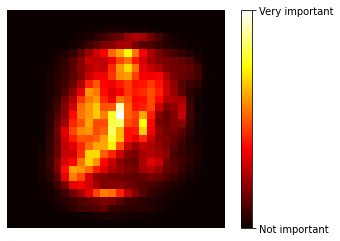

In [37]:
image = rf.feature_importances_
image = image.reshape(28,28)
plt.imshow(image, cmap='hot', interpolation='nearest')
plt.axis('off')
cbar = plt.colorbar(ticks=[rf.feature_importances_.min(), rf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

Get the 70 most important features

In [38]:
# get the important features (70)
n_features = 70
rf_important_features = rf.feature_importances_
idx_important_features = (-rf_important_features).argsort()[:n_features]

rf_partial_train_images = partial_train_images[:,idx_important_features]
rf_validation_images = validation_images[:,idx_important_features]
rf_test_images = test_images[:,idx_important_features]

print('Random Forest partial train shape: {}'.format(rf_partial_train_images.shape))
print('Random Forest validation shape: {}'.format(rf_validation_images.shape))
print('Random Forest test shape: {}'.format(rf_test_images.shape))

Random Forest partial train shape: (55000, 70)
Random Forest validation shape: (5000, 70)
Random Forest test shape: (10000, 70)


In [39]:
# use 1024 nodes which is the best model from experiment 3
model5 = models.Sequential()
model5.add(layers.Dense(1024, activation='relu', input_shape=(n_features,))) #70 features
model5.add(layers.Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              72704     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10250     
Total params: 82,954
Trainable params: 82,954
Non-trainable params: 0
_________________________________________________________________


In [40]:
# compile the neural network
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
# fit the model
experiment5_history = model5.fit(rf_partial_train_images, partial_train_labels, validation_data=(rf_validation_images, validation_labels),
                                epochs=100, callbacks=early_stopping, batch_size=128)

Epoch 1/100
430/430 [==============================] - 3s 5ms/step - loss: 0.7339 - accuracy: 0.7835 - val_loss: 0.3679 - val_accuracy: 0.8912
Epoch 2/100
430/430 [==============================] - 2s 4ms/step - loss: 0.3403 - accuracy: 0.8970 - val_loss: 0.2739 - val_accuracy: 0.9182
Epoch 3/100
430/430 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9185 - val_loss: 0.2380 - val_accuracy: 0.9318
Epoch 4/100
430/430 [==============================] - 2s 4ms/step - loss: 0.2206 - accuracy: 0.9323 - val_loss: 0.2208 - val_accuracy: 0.9338
Epoch 5/100
430/430 [==============================] - 2s 4ms/step - loss: 0.1974 - accuracy: 0.9385 - val_loss: 0.2109 - val_accuracy: 0.9368
Epoch 6/100
430/430 [==============================] - 2s 4ms/step - loss: 0.1845 - accuracy: 0.9424 - val_loss: 0.1977 - val_accuracy: 0.9420
Epoch 7/100
430/430 [==============================] - 2s 4ms/step - loss: 0.1663 - accuracy: 0.9486 - val_loss: 0.1870 - val_accuracy: 0.9446

In [41]:
# Get experiment results
partial_train_loss = experiment5_history.history['loss']
validation_loss = experiment5_history.history['val_loss']
partial_train_accuracy = experiment5_history.history['accuracy']
validation_accuracy = experiment5_history.history['val_accuracy']

plot_results(partial_train_accuracy, validation_accuracy, partial_train_loss, validation_loss)

In [42]:
experiment5_evaluate = model5.evaluate(x=rf_test_images, y=test_labels, batch_size=128, verbose=0)
print('Test accuracy using Random Forest: {}%'.format(np.round(experiment5_evaluate[1]*100,2)))
print('Test loss using Random Forest: {}'.format(np.round(experiment5_evaluate[0],4)))

Test accuracy using Random Forest: 94.97%
Test loss using Random Forest: 0.2736



*   The test accuracy was 98.45% and loss 0.1444 without PCA dimension reduction
*   The test accuracy was 98.43% and loss 0.1249 with PCA dimension reduction
*   The test accuracy was 94.97% and loss 0.2736 with Random Forest 70 most important features



The results are comparable. While using Random Forest to identfiy important features does not perform as well as using the full 784 features, Random Forest does provide a viable method to reduce training time to evaluate models that are much larger than the MNIST dataset. However, PCA is the preferred method and performs better than Random Forest and is similar to the full 784 features.

Confusion Matrix for Random Forest 70 most important features

In [52]:
# get prediction for best model in experiment 4
test_model5_prediction = np.argmax(model5.predict(rf_test_images), axis=-1)

# get confusion matrix for model 4
model5_confusion_matrix = metrics.confusion_matrix(test_model5_prediction, [np.argmax(y) for y in test_labels])
model5_confusion_matrix_df = pd.DataFrame(model5_confusion_matrix, columns=[x for x in range(10)])
model5_confusion_matrix_df.index = [x for x in range(10)]
model5_confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,953,1,2,5,1,8,20,1,7,7
1,1,1123,4,0,1,0,5,3,1,2
2,8,1,964,10,4,3,3,31,5,4
3,0,4,8,948,2,21,1,4,11,13
4,0,0,8,0,940,2,14,4,6,12
5,12,3,8,37,5,845,8,1,12,17
6,3,2,4,0,4,2,900,0,2,3
7,3,0,17,4,1,1,0,969,1,3
8,0,1,13,5,4,4,7,7,918,11
9,0,0,4,1,20,6,0,8,11,937


Classification Report for Random Forest 70 most important features

In [53]:
model5_classification_report = metrics.classification_report(test_model5_prediction, [np.argmax(y) for y in test_labels], output_dict=True)
model5_classification_report_df = pd.DataFrame(model5_classification_report).transpose()
model5_classification_report_df=np.round(model5_classification_report_df, 2)
model5_classification_report_df

,precision,recall,f1-score,support
0,0.97,0.95,0.96,1005.00
1,0.99,0.99,0.99,1140.00
2,0.93,0.93,0.93,1033.00
3,0.94,0.94,0.94,1012.00
4,0.96,0.95,0.96,986.00
5,0.95,0.89,0.92,948.00
6,0.94,0.98,0.96,920.00
7,0.94,0.97,0.96,999.00
8,0.94,0.95,0.94,970.00
9,0.93,0.95,0.94,987.00


## **Experiment 6**
**Explore changing the number of nodes in a single hidden layer. Also explore more than one hidden layer**

In [43]:
nn_architectures = {
    '2x10': [10, 10],
    '2x20': [20, 20],
    '2xMix': [150, 50],
    '5x10': [10, 10, 10, 10, 10],
    '5x20': [20, 20, 20, 20, 20],
    '5xMix': [300, 200, 100, 50, 25]
}

In [44]:
experiment6_history = {}

for archecture in nn_architectures:
  print('{}: {}'.format(archecture, nn_architectures[archecture]))
  model6 = models.Sequential()
  first_layer = True

  for layer_nodes in nn_architectures[archecture]:
    if first_layer == True:
      model6.add(layers.Dense(layer_nodes, activation='relu', input_shape=(784,)))
    else:
      model6.add(layers.Dense(layer_nodes, activation='relu'))
    first_layer = False
  model6.add(layers.Dense(10, activation='softmax'))
  
  # compile the neural network
  model6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # early stopping
  early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', verbose=0, patience=25)
  # fit the model
  start = time.time()
  history = model6.fit(partial_train_images, partial_train_labels, validation_data=(validation_images, validation_labels),
                                  epochs=100, callbacks=early_stopping, batch_size=128, verbose=0)
  
  # stats
  end = time.time()
  total_time = end - start
  num_epochs = len(history.history['loss'])
  m_evaluate = model6.evaluate(x=test_images, y=test_labels, batch_size=128, verbose=0)
  m_loss = m_evaluate[0]
  m_accuracy = m_evaluate[1]

  print('Fit model with {} nodes in {} seconds and stopped after {} epochs; loss = {} and accuracy = {}'.format(n, total_time, num_epochs,
                                                                                                                np.round(m_loss, 2), np.round(m_accuracy, 2)))
  
  # store history and model
  experiment6_history.update({archecture: {'history': history, 'model': model6, 'time': total_time, 'num_epochs': num_epochs, 
                                                     'loss': m_loss, 'accuracy': m_accuracy}})



2x10: [10, 10]
Fit model with 1024 nodes in 38.05885171890259 seconds and stopped after 58 epochs; loss = 0.22 and accuracy = 0.94
2x20: [20, 20]
Fit model with 1024 nodes in 35.03272247314453 seconds and stopped after 50 epochs; loss = 0.17 and accuracy = 0.96
2xMix: [150, 50]
Fit model with 1024 nodes in 50.045997619628906 seconds and stopped after 35 epochs; loss = 0.19 and accuracy = 0.98
5x10: [10, 10, 10, 10, 10]
Fit model with 1024 nodes in 64.57436275482178 seconds and stopped after 89 epochs; loss = 0.26 and accuracy = 0.93
5x20: [20, 20, 20, 20, 20]
Fit model with 1024 nodes in 53.86732244491577 seconds and stopped after 68 epochs; loss = 0.26 and accuracy = 0.95
5xMix: [300, 200, 100, 50, 25]
Fit model with 1024 nodes in 185.88718676567078 seconds and stopped after 62 epochs; loss = 0.31 and accuracy = 0.98


In [45]:
experiment6_performance = {'Architecture': [], '# Nodes': [], 'Test Accuracy (%)': [], 'Test Loss': [], 
                           'Epochs Before Stop': [], 'Process Time (seconds)': []}

for archecture in nn_architectures:
  node_results = experiment6_history[archecture]
  experiment6_performance['Architecture'].append(archecture)
  experiment6_performance['# Nodes'].append(nn_architectures[archecture])
  experiment6_performance['Test Accuracy (%)'].append(np.round(node_results['accuracy']*100,2))
  experiment6_performance['Test Loss'].append(np.round(node_results['loss'],4))
  experiment6_performance['Epochs Before Stop'].append(node_results['num_epochs'])
  experiment6_performance['Process Time (seconds)'].append(np.round(node_results['time'], 2))

pd.DataFrame(experiment6_performance)

,Architecture,# Nodes,Test Accuracy (%),Test Loss,Epochs Before Stop,Process Time (seconds)
0,2x10,"[10, 10]",94.09,0.2236,58,38.06
1,2x20,"[20, 20]",96.08,0.1654,50,35.03
2,2xMix,"[150, 50]",97.81,0.1942,35,50.05
3,5x10,"[10, 10, 10, 10, 10]",93.15,0.2627,89,64.57
4,5x20,"[20, 20, 20, 20, 20]",95.40,0.2574,68,53.87
5,5xMix,"[300, 200, 100, 50, 25]",98.34,0.3087,62,185.89


The best model is still from experiment 3 using 1024 nodes in a single hidden layer. In experiment 3 the test accuracy was 98.45% and loss 0.1444 compared to all the models in experiement 6